# imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
nltk.download('punkt')
nltk.download('stopwords')

pd.set_option('display.max_colwidth', None)


import string

import re

[nltk_data] Downloading package punkt to /home/shailja/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/shailja/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# data load

In [2]:
df1 = pd.read_excel('Continual_Learning/G1.xlsx', index_col=0)
df2 = pd.read_excel('Continual_Learning/G2.xlsx', index_col=0)
df3 = pd.read_excel('Continual_Learning/G3.xlsx', index_col=0)

In [3]:
df1.head()

,ID,tags,text
0,NCT02105766,"8:16:chronic_disease,20:32:treatment",portal fibrosis by liver biopsy
1,NCT03008070,22:34:treatment,Contra-indication to liver biopsy
2,NCT03008070,",32:44:treatment,,",Have a stable weight since the liver biopsy was performed defined by no more than a 5 % loss of initial body weight
3,NCT03008070,"26:38:treatment,",Subject agrees to have a liver biopsy performed after 24 weeks of treatment
4,NCT02515708,",43:55:treatment,",Liver steatosis (on visual estimate or on liver biopsy) > 30%


In [4]:
df1[["tags", "text"]]

,tags,text
0,"8:16:chronic_disease,20:32:treatment",portal fibrosis by liver biopsy
1,22:34:treatment,Contra-indication to liver biopsy
2,",32:44:treatment,,",Have a stable weight since the liver biopsy was performed defined by no more than a 5 % loss of initial body weight
3,"26:38:treatment,",Subject agrees to have a liver biopsy performed after 24 weeks of treatment
4,",43:55:treatment,",Liver steatosis (on visual estimate or on liver biopsy) > 30%
...,...,...
7351,"46:63:cancer,73:80:treatment,82:91:treatment,96:108:treatment","Subjects with (newly diagnosed or recurrent) metastatic cancer for whom surgery, radiation, or radiosurgery has not been advised by the treating physician"
7352,"1:5:treatment,11:13:cancer,39:48:treatment",MIBG-avid NB and evaluable disease on MIBG scan at time of enrollment on protocol
7353,"27:29:cancer,157:171:cancer,186:208:chronic_disease","ust have the diagnosis of NB in accordance with the International Criteria, i.e., either histopathology (confirmed by the MSKCC Department of Pathology) or BM involvement plus elevated urinary catecholamines"
7354,"40:51:treatment,53:69:treatment,71:90:treatment,95:113:treatment","Subjects who have contraindications to carboplatin, cyclophosphamide, etoposide phosphate, or sodium thiosulfate"


In [5]:
df1.shape, df2.shape, df3.shape

((7356, 3), (6455, 3), (6277, 3))

# Tags Analysis

In [6]:
def get_tags(row):

    # Define a regular expression pattern to match the keywords
    pattern = r'\d+:\d+:(\w+)'

    # Use re.findall to extract the keywords from the input string
    result = re.findall(pattern, row["tags"])

    return result


In [7]:
def plot_tags(df_list):
    num_plots = len(df_list)
    fig, axes = plt.subplots(1, num_plots, figsize=(15, 6), sharey=True)

    for i, df in enumerate(df_list):
        # Extract tags
        df['extracted_tags'] = df.apply(get_tags, axis=1)

        # Flatten the lists in the 'extracted_tags' column
        df_expanded = df['extracted_tags'].apply(pd.Series).stack().reset_index(drop=True).sort_values(ascending=False)

        # Create a count plot
        sns.countplot(y=df_expanded, ax=axes[i])
        axes[i].set_title(f'Count Plot - DataFrame {i+1}')
        axes[i].set_xlabel('Count')
        axes[i].set_ylabel('Extracted Tags')
        axes[i].set_yticks(range(len(df_expanded.unique())))
        axes[i].set_yticklabels(df_expanded.unique())

    plt.tight_layout()
    plt.show()

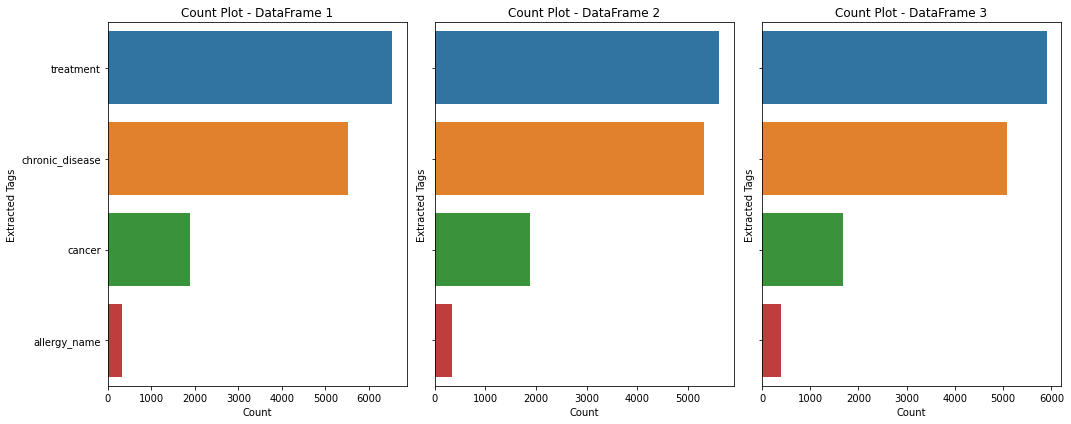

In [8]:
plot_tags([df1, df2, df3])

- Almost data-distribution for each entity in all three files is similar.

# Text Analysis

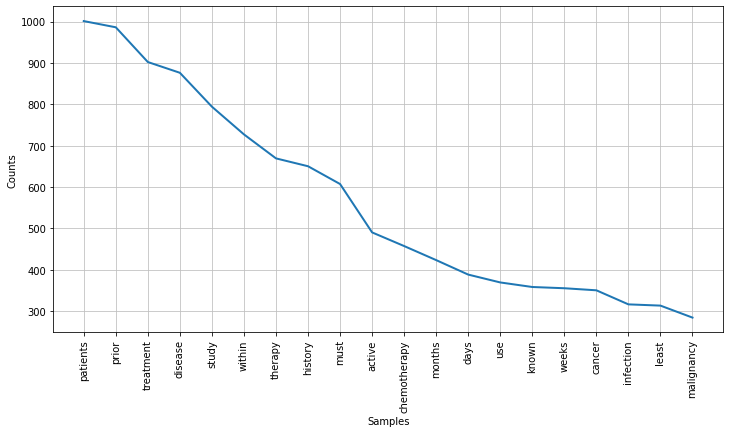

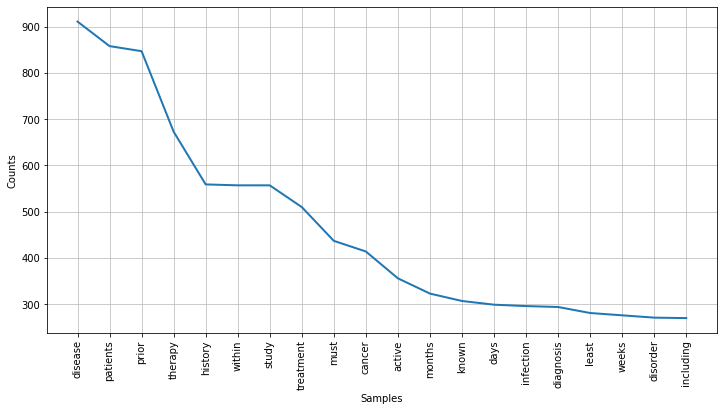

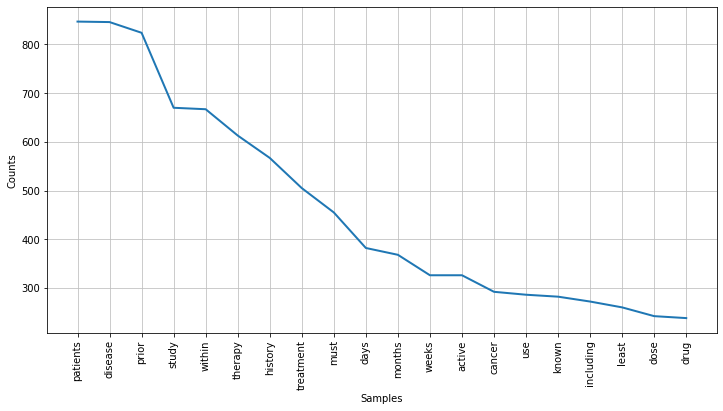

In [10]:
def get_word_count_plot(dataframes, column, num_tokens=10):
    for df in dataframes:
        text_data = df[column].str.cat(sep=' ')

        # Tokenize the text
        tokens = word_tokenize(text_data)

        stop_words = set(stopwords.words('english'))
        filtered_tokens = [word.lower() for word in tokens if word.lower() not in stop_words and word not in string.punctuation and not word.isdigit()]

        # Calculate the frequency distribution
        fdist = FreqDist(filtered_tokens)

        # Plot the word distribution
        plt.figure(figsize=(12, 6))
        fdist.plot(num_tokens, cumulative=False)  # Adjust the number inside plot to display more or fewer words
        plt.show()


get_word_count_plot([df1, df2, df3], 'text', num_tokens=20)


- Almost words distribution for each entity in all three files is similar.